In [4]:


from platform import python_version

print(python_version())


3.9.2


In [1]:
# imports
from __future__ import print_function
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.regularizers import l2
import numpy as np
import seaborn as sns

In [2]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)


In [5]:
len(x_train[0])

28

In [6]:
len(x_train[0][0])

28

In [7]:
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.4545 - accuracy: 0.8709 - val_loss: 0.2634 - val_accuracy: 0.9213
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.2149 - accuracy: 0.9375 - val_loss: 0.1805 - val_accuracy: 0.9474
Epoch 3/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.1647 - accuracy: 0.9518 - val_loss: 0.1468 - val_accuracy: 0.9577
Epoch 4/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1361 - accuracy: 0.9610 - val_loss: 0.1365 - val_accuracy: 0.9603
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1179 - accuracy: 0.9648 - val_loss: 0.1186 - val_accuracy: 0.9653
Epoch 6/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.1036 - accuracy: 0.9689 - val_loss: 0.1205 - val_accuracy: 0.9631
Epoch 7/10
60000/60000 [==============================] - 1s 24us/st

In [8]:
model.summary() # used to get parameters of the network

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


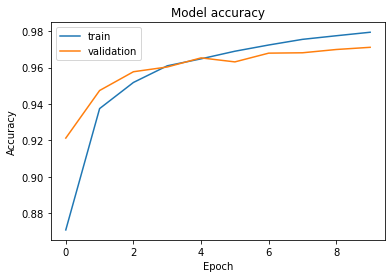

In [9]:
# accuracy plot 
plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# KOLLA NEDAN!

In [10]:
epochs = 40 # increase epoche number to 40 

In [98]:
## 300/500 model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(300, activation = 'relu')) # changed number of units to 300
model.add(Dense(500, activation = 'relu')) # 500 units 
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 6s 102us/step - loss: 0.4198 - accuracy: 0.8822 - val_loss: 0.2280 - val_accuracy: 0.9340
Epoch 2/40
60000/60000 [==============================] - 4s 72us/step - loss: 0.2001 - accuracy: 0.9414 - val_loss: 0.1783 - val_accuracy: 0.9459
Epoch 3/40
60000/60000 [==============================] - 4s 71us/step - loss: 0.1467 - accuracy: 0.9576 - val_loss: 0.1269 - val_accuracy: 0.9603
Epoch 4/40
60000/60000 [==============================] - 5s 82us/step - loss: 0.1172 - accuracy: 0.9658 - val_loss: 0.1147 - val_accuracy: 0.9655
Epoch 5/40
60000/60000 [==============================] - 5s 78us/step - loss: 0.0968 - accuracy: 0.9718 - val_loss: 0.0939 - val_accuracy: 0.9702
Epoch 6/40
60000/60000 [==============================] - 4s 72us/step - loss: 0.0808 - accuracy: 0.9765 - val_loss: 0.0944 - val_accuracy: 0.9711
Epoch 7/40
60000/60000 [==============================] - 6s 96us/s

In [16]:
## Model with weights ##

values = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7] # the weights used 

output=[] # store output 

# total rounds will be 15 in the end 
for value in values: # for all weight values
    y=1
    accuracy_score=[]
    while y<4: # loop every weight three times
        model = Sequential()

        model.add(Flatten())
        model.add(Dense(300, activation = 'relu',kernel_regularizer=l2(value)))
        model.add(Dense(500, activation = 'relu',kernel_regularizer=l2(value)))
        model.add(Dense(num_classes, activation='softmax'))


        model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
            metrics=['accuracy'],)

        fit_info = model.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=1,
               validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        accuracy_score.append(score[1])
        y+=1
    output.append(accuracy_score) # store output for the accuracy score 
    
    

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 7s 110us/step - loss: 1.1933 - accuracy: 0.8777 - val_loss: 0.9442 - val_accuracy: 0.9302
Epoch 2/40
60000/60000 [==============================] - 6s 97us/step - loss: 0.8580 - accuracy: 0.9398 - val_loss: 0.7720 - val_accuracy: 0.9469
Epoch 3/40
60000/60000 [==============================] - 6s 97us/step - loss: 0.7112 - accuracy: 0.9541 - val_loss: 0.6478 - val_accuracy: 0.9590
Epoch 4/40
60000/60000 [==============================] - 6s 96us/step - loss: 0.6016 - accuracy: 0.9625 - val_loss: 0.5551 - val_accuracy: 0.9648
Epoch 5/40
60000/60000 [==============================] - 6s 95us/step - loss: 0.5151 - accuracy: 0.9684 - val_loss: 0.4837 - val_accuracy: 0.9669
Epoch 6/40
60000/60000 [==============================] - 6s 95us/step - loss: 0.4451 - accuracy: 0.9731 - val_loss: 0.4237 - val_accuracy: 0.9693
Epoch 7/40
60000/60000 [==============================] - 6s 93us/s

In [79]:
output

[[0.9807000160217285, 0.9786999821662903, 0.9797000288963318],
 [0.9811999797821045, 0.9825999736785889, 0.9814000129699707],
 [0.98089998960495, 0.9819999933242798, 0.982200026512146],
 [0.9811000227928162, 0.9815000295639038, 0.9812999963760376],
 [0.9814000129699707, 0.9815000295639038, 0.9814000129699707]]

In [102]:
# mean value for every weight from the 3 repeats 
y=[]
for i in output:
        y.append(np.mean(i))
y

[0.9797000090281168,
 0.9817333221435547,
 0.9817000031471252,
 0.9813000162442526,
 0.9814333518346151]

In [103]:
# standard deviation
sd=[]
for i in output:
        sd.append(np.std(i))
sd

[0.0008165104024733711,
 0.000618232416622748,
 0.000571559019880347,
 0.0001633020810748201,
 4.714827453418679e-05]

In [104]:
# upper bound std
sdp=[]
tick=0
for i in y:    
    new=i+sd[tick]
    sdp.append(new)
    tick+=1
sdp

[0.9805165194305901,
 0.9823515545601774,
 0.9822715621670056,
 0.9814633183253274,
 0.9814805001091493]

In [105]:
# lower bound std 
sdn=[]
tick=0
for i in y:    
    new = i-sd[tick]
    sdn.append(new)
    tick+=1
sdn

[0.9788834986256435,
 0.981115089726932,
 0.9811284441272449,
 0.9811367141631777,
 0.9813862035600809]

In [106]:
x=['1e-3','1e-4','1e-5','1e-6','1e-7'] # weight x tick labels 

<function matplotlib.pyplot.show(close=None, block=None)>

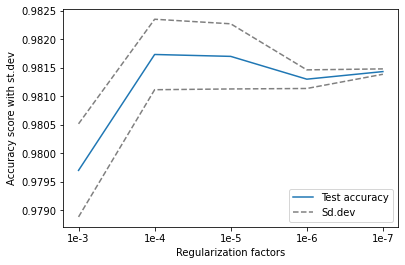

In [107]:
plt.plot(x,y)
plt.plot(x,sdp,color='gray',linestyle='dashed')
plt.plot(x,sdn,color='gray',linestyle='dashed')
plt.ylabel('Accuracy score with st.dev')
plt.xlabel('Regularization factors')
plt.legend(['Test accuracy', 'Sd.dev'], loc='lower right')
plt.savefig('accuracy')
plt.show